In [2]:
import torch
import matplotlib.pyplot as plt
import os

from torchvision.datasets import CIFAR10

In [10]:
DATA_DIR = r'C:\Users\cesar\Documents\ApsVC\RedeNeuralConvolucional\datasets'
CATEGORIES = ['aviao', 'automovel', 'passaro', 'gato', 'cervo'
              , 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhao']

In [8]:
cifar10_train = CIFAR10(DATA_DIR, train=True, download=False)
cifar10_test = CIFAR10(DATA_DIR, train=False, download=False)

100.0%


Extracting C:\Users\cesar\Documents\ApsVC\RedeNeuralConvolucional\datasets\cifar-10-python.tar.gz to C:\Users\cesar\Documents\ApsVC\RedeNeuralConvolucional\datasets
Files already downloaded and verified


In [9]:
len(cifar10_train), len(cifar10_test)

(50000, 10000)

In [13]:
def lookat_database(dataset, istensor=False):
    figure = plt.figure(figsize=(8, 8))
    rows, cols = 2, 2
    for i in range(1, 5):
        sample_idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(CATEGORIES[label])
        plt.axis("off")
        if istensor:
            plt.imshow(img.squeeze().permute(1, 2, 0))
        else:
            plt.imshow(img)
    plt.show()

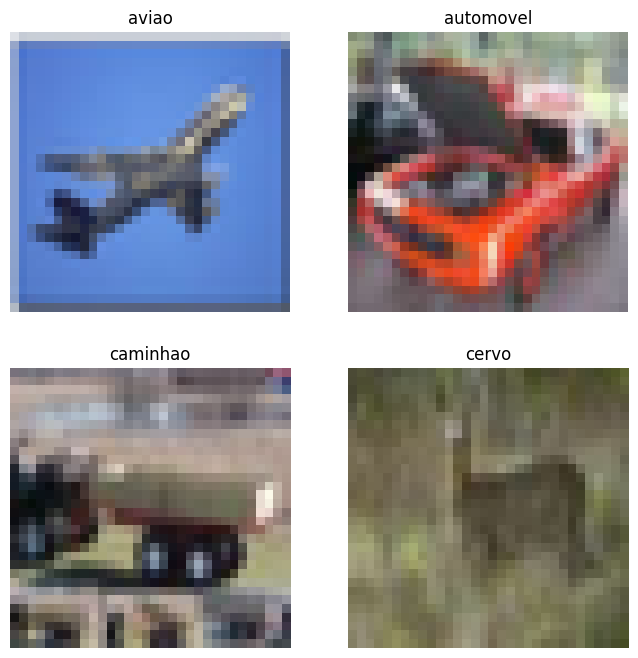

In [20]:
lookat_database(cifar10_train)

### Pre-processamento dos dados

In [21]:
import torchvision.transforms as T

In [28]:
prep_transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(
            (0.4914, 0.4822, 0.4465),
            (0.2470, 0.2435, 0.2616)
        )
    ]
)

tensor_train = CIFAR10(DATA_DIR, train=True, 
                       download=False, transform = prep_transform)
tensor_test =  CIFAR10(DATA_DIR, train=False, 
                       download=False, transform = prep_transform)

In [23]:
imgs = torch.stack([img_t for img_t, _ in tensor_train], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [26]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [27]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92728764..2.1264887].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6420825..1.8050807].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9577202..2.115826].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5290467..2.0620687].


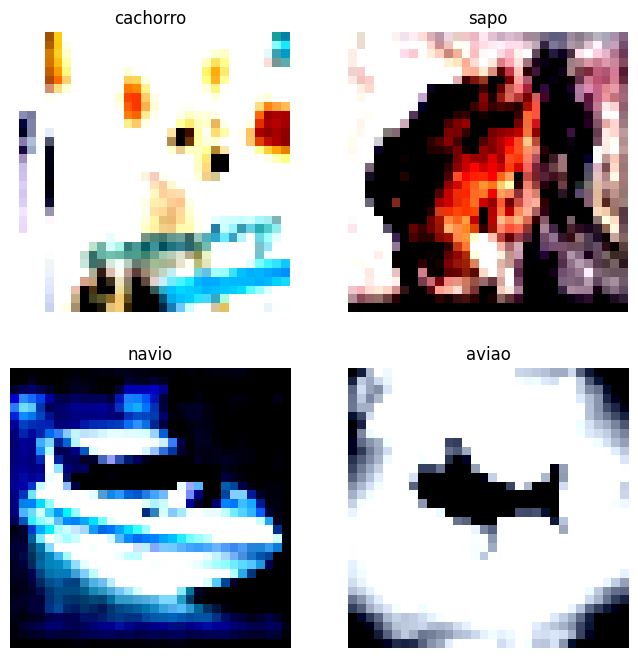

In [32]:
lookat_database(tensor_train, True)

### Criando Dataloaders


In [34]:
from torch.utils.data import DataLoader

In [35]:
batch_size = 64
train_loader = DataLoader(tensor_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(tensor_test, batch_size=batch_size, shuffle=True)

### Construindo MLP

In [36]:
from torch import nn

In [37]:
class MLPClassifier(nn.Module):

    def __init__(self):
        super().__init__() 
        
        self.flatten = nn.Flatten()

        self.layers = nn.Sequential(
            nn.Linear(32 * 32 * 3, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )




    def forward(self, x):
        v = self.flatten(x)
        return self.layers(v)

In [40]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [41]:
model = MLPClassifier().to(device)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()